## MNIST digits classification using random forest classifier



### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from matplotlib.legend_handler import HandlerLine2D




%matplotlib inline


In [3]:
# Stop deprecation warnings from being printed

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


MNIST ( Mixed National Institute of Standards and Technology ) is a database of handwritten digits that is commonly used for training image processing sytems.

It is msotly used for training and testing in the field of machine learning. In our study we will be using the MNIST data(low-resolution) from the sklearn database . 

Each MNIST digits is labelled with class 0,$\ldots$, 9. The images are 8 x 8 pixels in size with integer from range 0 to 16..

### Loading data and checking data

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

### Get size of dataframes


In [6]:
digits.target.shape

(1797,)

In [7]:
digits.data.shape

(1797, 64)

### Loading the data into pandas  dataframe

In [8]:
mnist_df = pd.DataFrame(digits.data)
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


We will like to customize the features and add the target to the dataframe

In [9]:
name_columns = []

for i in range (1,65):
    name_columns += ['pixel ' + str(i)]

mnist_df.columns = name_columns
mnist_df['Labels'] = digits.target

In [10]:
mnist_df.head()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,Labels
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


###  Data Description

In [11]:
mnist_df.describe()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,Labels
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


### Data Types

In [12]:
mnist_df.dtypes[:5]

pixel 1    float64
pixel 2    float64
pixel 3    float64
pixel 4    float64
pixel 5    float64
dtype: object

### Checking for missing data

In [13]:
mnist_df.isnull().sum()[:15]

pixel 1     0
pixel 2     0
pixel 3     0
pixel 4     0
pixel 5     0
pixel 6     0
pixel 7     0
pixel 8     0
pixel 9     0
pixel 10    0
pixel 11    0
pixel 12    0
pixel 13    0
pixel 14    0
pixel 15    0
dtype: int64

In [14]:
mnist_df.isnull().sum()[-10:]

pixel 56    0
pixel 57    0
pixel 58    0
pixel 59    0
pixel 60    0
pixel 61    0
pixel 62    0
pixel 63    0
pixel 64    0
Labels      0
dtype: int64

There is no missing data

### Visualize the image.
Visualizing the first 10 examples of the data.

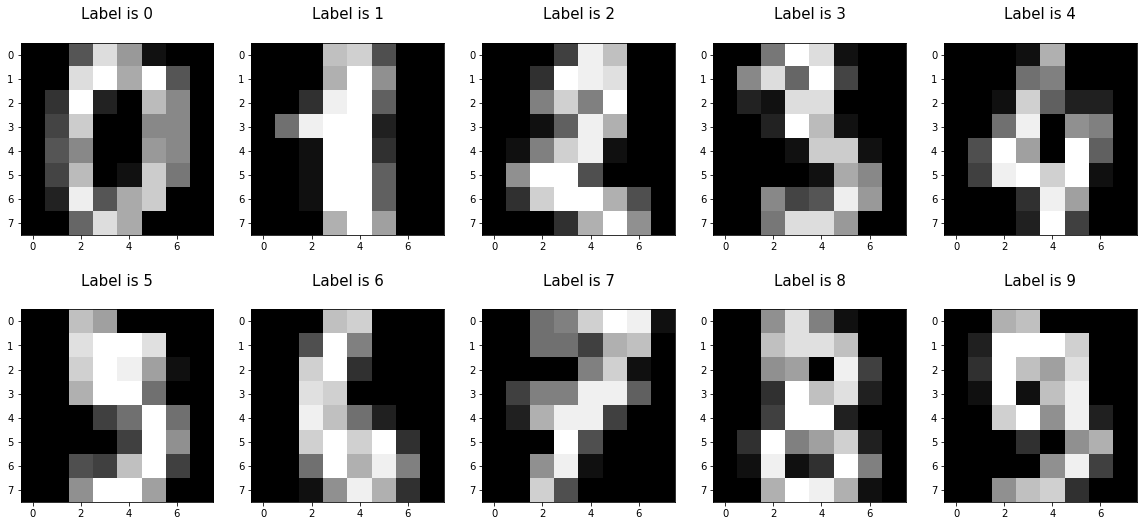

In [15]:
plt.figure(figsize = (20,9))
pixel = mnist_df.iloc[0:10, 0:64].values
target = mnist_df.iloc[0:10,-1 ].values

for index, (image, label) in enumerate(zip(pixel,target)):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Label is %i\n' % label, fontsize = 15)

###  Splitting the dataset into training and testing set
 For any supervise machine learning task, the idea of building model using all the dataset is not good approach. The main goal is to find out how good your model will be when 'an unseen' dataset is evaluated. It is highly recommended to always split your data into a training and testing set. In this light we do a 70$\%$ - 30$\%$ random split of data between training and testing respectively.

In [16]:
X = mnist_df.iloc[: , 0:64].values
Y = mnist_df['Labels'].values


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [18]:
X_train.shape, Y_train.shape

((1257, 64), (1257,))

In [19]:
X_test.shape, Y_test.shape

((540, 64), (540,))

 ### Fitting a random forest with default parameters to get a baseline idea of the performance

In [20]:
base_model = RandomForestClassifier(random_state=11)
base_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

### Testing and  Evaluating the model
Now our model is ready, we must evaluate our model. In a classification problem, its common to evaluate the model  using the accuracy.


In [21]:
# predicting the model for X_train sample 

y_predtrain = base_model.predict(X_train)


# classification accuracy for the training data prediction verses actual

accuracy_score(y_predtrain, Y_train)

1.0

In [22]:
# predicting the model for X_test sample 

y_predtest = base_model.predict(X_test)

# classification accuracy for the test data prediction verses actual

accuracy_score(y_predtest, Y_test)


0.9388888888888889

## Tuning parameter for random forest performance

### Independent Parameter tuning

- Tuning parameters independently is not the best approach but it will reveal or give us an insight information of the respective parameters for better random forest performance.


In [23]:
# tuning n_estimators

n_estimators = [1, 2, 4, 10, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
    rf= RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state= 11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)

    train_acc = accuracy_score(train_pred, Y_train)
    train_results += [train_acc]

    y_pred = rf.predict(X_test)
    
    pred_acc = accuracy_score(y_pred, Y_test)
    test_results += [pred_acc] 

In [24]:
# tuning max_depth
max_depths = [int(x) for x in np.linspace(1, 30, 30, endpoint=True)]

trainresult= []
testresult = []
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)


    y_pred = rf.predict(X_test)
    
    
    trainresult.append(accuracy_score(train_pred, Y_train))
    
    testresult.append(accuracy_score(y_pred, Y_test))
    


In [25]:
#tuning min_samples_split with value greater or equal to 2

min_samples_splits = list(range(2,12))
train_result = []
test_result = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    train_result.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    test_result.append(pred_accuracy)




In [26]:
#tuning min_samples_split with value between (0,0.5]

min_samples_splits1 = np.linspace(0.1, 1, 10, endpoint=True)

train_result1 = []
test_result1 = []
for min_samples_split in min_samples_splits1:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    train_result1.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    test_result1.append(pred_accuracy)




In [27]:
#tuning min_samples_leaf with value greater or equal to 2

min_samples_leafs = list(range(2,12))

trainresults = []
testresults = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    trainresults.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    testresults.append(pred_accuracy)



In [28]:
#tuning min_samples_leaf with value between (0,0.5]

min_samples_leafs1 = np.linspace(0.1, 0.5, 10, endpoint=True)

trainresults1 = []
testresults1 = []
for min_samples_leaf in min_samples_leafs1:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    trainresults1.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    testresults1.append(pred_accuracy)



In [29]:
# tuning max_feature

max_features = list(range(1,mnist_df.shape[1]-1))

train_res= []
test_res = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    train_acc = accuracy_score(train_pred, Y_train)
    train_res += [train_acc]

    y_pred = rf.predict(X_test)
    pred_acc = accuracy_score(y_pred, Y_test)
    test_res += [pred_acc]
    


Having a look at all the relationship between the Accracy score and the various parameters

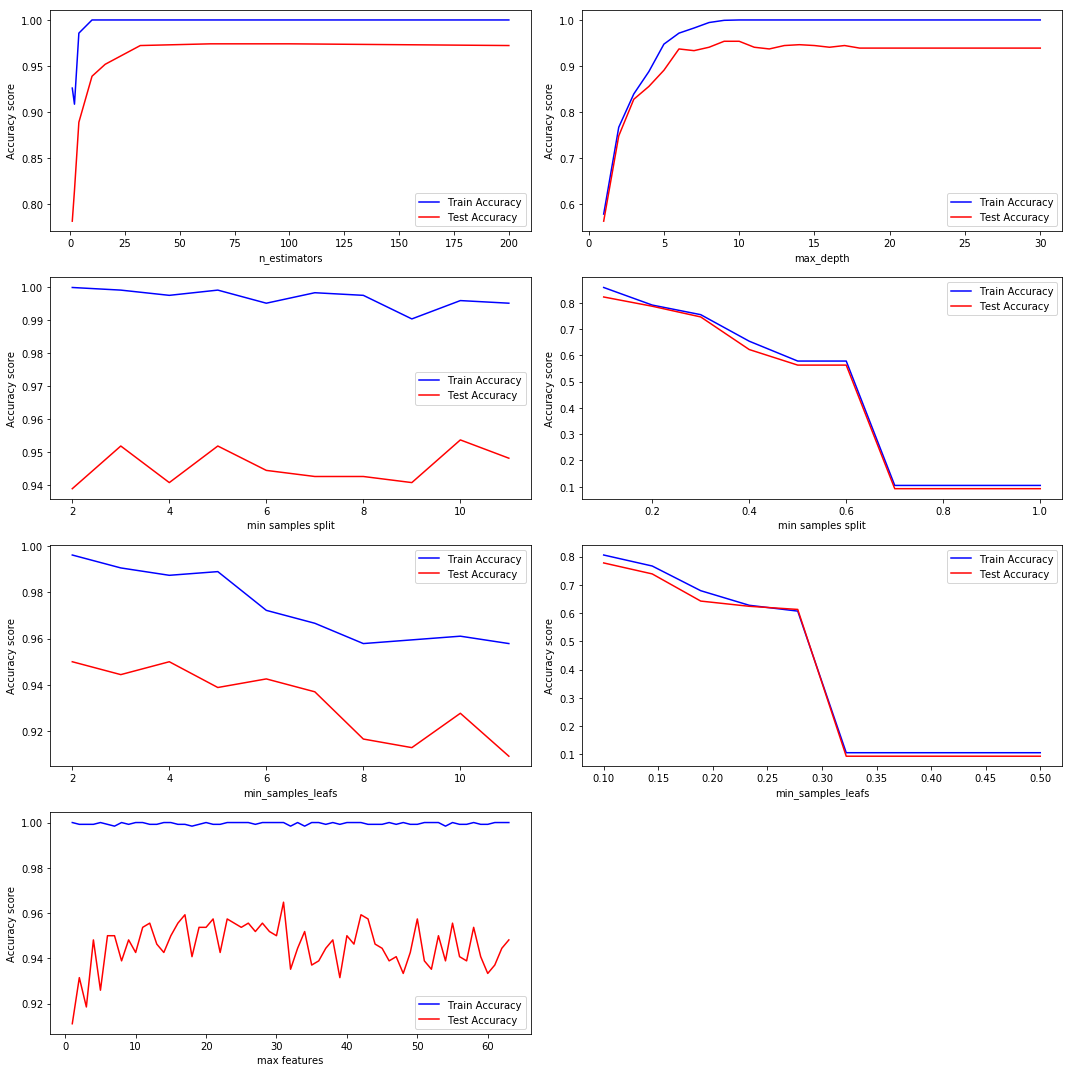

In [30]:
fig = plt.figure(figsize=(15, 15))

# Ploting the Accuracy against the n_estimators 
sub1 = fig.add_subplot(421)
sub1.plot(n_estimators, train_results, 'b', label= 'Train Accuracy' )
sub1.plot(n_estimators, test_results, 'r',  label = 'Test Accuracy')
sub1.set_xlabel('n_estimators')
sub1.set_ylabel('Accuracy score')
plt.legend()


# Ploting Accuracy against max_depth 
sub2 = fig.add_subplot(422)
sub2.plot(max_depths, trainresult, 'b', label= 'Train Accuracy')
sub2.plot(max_depths, testresult, 'r',  label = 'Test Accuracy')
sub2.set_xlabel('max_depth')
sub2.set_ylabel('Accuracy score')
plt.legend()

#  Ploting Accuracy against min_samples_split with interval greater equal to 2
sub3 = fig.add_subplot(423)
sub3.plot(min_samples_splits, train_result, 'b', label= 'Train Accuracy')
sub3.plot(min_samples_splits, test_result, 'r', label= 'Test Accuracy')
sub3.set_xlabel('min samples split')
sub3.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_split interval lies between (0,0.5]
sub4 = fig.add_subplot(424)
sub4.plot(min_samples_splits1, train_result1, 'b', label= 'Train Accuracy')
sub4.plot(min_samples_splits1, test_result1, 'r', label= 'Test Accuracy')
sub4.set_xlabel('min samples split')
sub4.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_leaf with interval greater equal to 2
sub5 = fig.add_subplot(425)
sub5.plot(min_samples_leafs, trainresults, 'b', label='Train Accuracy')
sub5.plot(min_samples_leafs, testresults, 'r', label='Test Accuracy')
sub5.set_xlabel('min_samples_leafs')
sub5.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_leaf interval lies between (0,0.5]
sub6 = fig.add_subplot(426)
sub6.plot(min_samples_leafs1, trainresults1, 'b', label='Train Accuracy')
sub6.plot(min_samples_leafs1, testresults1, 'r', label='Test Accuracy')
sub6.set_xlabel('min_samples_leafs')
sub6.set_ylabel('Accuracy score')
plt.legend()
# Ploting Accuracy against max_feature
sub7 = fig.add_subplot(427)
sub7.plot(max_features, train_res, 'b', label='Train Accuracy')
sub7.plot(max_features, test_res, 'r', label='Test Accuracy')
sub7.set_xlabel('max features')
sub7.set_ylabel('Accuracy score')
plt.legend()


plt.tight_layout()
plt.show()



I can narrow search of parameters using the plots above. For example, the tree depth has steadily constant from 15 and thus I will be considering an interval from that points. Also, the number of trees can take a a  range from 65 upwards. Similarly, min_samples_leaf decreases so I will stick with value 2 since its give a better accuracy.In the case of max_feature,I observed that at value the 8 there was a better model accuracy. Therefore I will restrict my search to default value that is 'auto' which the sqaure roots of the number of features. In our situation that will be 8.



### Searching multiple parameters simultaneously
We will be looking at two method of parameter tuning:
-  $\textbf{Using GridSearchCV} $ :


- $ \textbf{Using RandomSearchCV} $:



## Hyperparameter Tuning Using RandomSearch 
Random search helps optimize our parameter tuning by selecting random points in the hyperparameter space and the choose the model with the best performance. We will study the results to be able to create a hyperarameter space for a Grid search method which uses all the different combination of parameter in order to select the model with the highest accuracy score.

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 200, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 30, num = 10)]
max_depth.append(None)

# evaulation criterion 
criterion =['gini', 'entropy']

#evaluation of oob_score
oob_score = [False, True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'criterion': criterion,
             'oob_score': oob_score}

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.
Cross validation is a method used to improve the mdoel on unseen data. This procedure separates the X_train data set in K-folds of approximately equal size. A single subsample is used as the validaton data for testing and the model is fit on the remaining k-1 folds. For our case study we use a range from 2 to 10 for k values.
Also we willing be looking at varying the parameter n_iter after this analysis. This parameter controls number of random combinations the algorithm will try. Lastly, vary both of them simultaneously.

In [33]:
'''
Random search of parameters
using  i- fold cross validation
search accross n range of different possiblities
'''



# list integers 2 to 10 we want to try
# for the number of folds
k_range = range(2,11)


# list of scores from niter_range
mean_val_error = []
train_error=[]
test_error= []


#for j in niter_range:
for i in k_range:
        rf_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = i, 
                               verbose=0, random_state=42, n_jobs = -1)
    
        # Fit the random search model
        rf_random.fit(X_train, Y_train)
    
        # Using the best parameter found to instantiate a model
        cfl = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=rf_random.best_params_['criterion'],
            max_depth=rf_random.best_params_['max_depth'], max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=rf_random.best_params_['n_estimators'], n_jobs=-1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)
        
        cfl.fit(X_train, Y_train)
    
        # Accuracy on train and test data
        Y_predtrain =cfl.predict(X_train)
        Y_predtest = cfl.predict(X_test)
    
        print('CV',i, ", mean_test_score", rf_random.best_score_,', best_params', rf_random.best_params_,
          ', Acc_train', accuracy_score(Y_predtrain, Y_train), ', Acc_test',accuracy_score(Y_predtest, Y_test))
    


CV 2 , mean_test_score 0.9649960222752586 , best_params {'oob_score': False, 'max_depth': None, 'criterion': 'entropy', 'n_estimators': 200} , Acc_train 1.0 , Acc_test 0.9740740740740741
CV 3 , mean_test_score 0.9657915672235481 , best_params {'oob_score': True, 'max_depth': 21, 'criterion': 'entropy', 'n_estimators': 162} , Acc_train 1.0 , Acc_test 0.9722222222222222
CV 4 , mean_test_score 0.9729514717581543 , best_params {'oob_score': True, 'max_depth': 21, 'criterion': 'entropy', 'n_estimators': 162} , Acc_train 1.0 , Acc_test 0.9722222222222222
CV 5 , mean_test_score 0.9713603818615751 , best_params {'oob_score': False, 'max_depth': None, 'criterion': 'entropy', 'n_estimators': 200} , Acc_train 1.0 , Acc_test 0.9740740740740741
CV 6 , mean_test_score 0.9729514717581543 , best_params {'oob_score': True, 'max_depth': 23, 'criterion': 'entropy', 'n_estimators': 124} , Acc_train 1.0 , Acc_test 0.9722222222222222


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV 7 , mean_test_score 0.9753381066030231 , best_params {'oob_score': False, 'max_depth': None, 'criterion': 'entropy', 'n_estimators': 200} , Acc_train 1.0 , Acc_test 0.9740740740740741
CV 8 , mean_test_score 0.9761336515513126 , best_params {'oob_score': True, 'max_depth': 21, 'criterion': 'entropy', 'n_estimators': 162} , Acc_train 1.0 , Acc_test 0.9722222222222222


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV 9 , mean_test_score 0.9761336515513126 , best_params {'oob_score': True, 'max_depth': 23, 'criterion': 'gini', 'n_estimators': 162} , Acc_train 1.0 , Acc_test 0.9722222222222222
CV 10 , mean_test_score 0.9769291964996022 , best_params {'oob_score': True, 'max_depth': 30, 'criterion': 'gini', 'n_estimators': 143} , Acc_train 1.0 , Acc_test 0.9703703703703703


Fixing the number of iteration to 100 and k ranging from 2 to 10 we obtain the following results
 - CV stands for cross validation
 - best_params indicates the best parameter score
 - mean_test_score is the score on the validation set
 - Acc_test is the score on the test set
 
We observe that the mean_score values are increasing and when k = 2,5 the model performs better on the test data as compared to our basemodel 
 

## Varying the k and n_iter simultaneously

In [ ]:
# list integers 2 to 10 we want to try
# for the number of folds
k_range = range(2,11)


# list integers 2 to 10 we want to try
# for the number of iterations

 niter_range = range(20,110,10)

# list of scores from niter_range
mean_val_error = []
train_error=[]
test_error= []


for j in niter_range:
    for i in k_range:
        rf_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = i, 
                               verbose=0, random_state=42, n_jobs = -1)
    
        # Fit the random search model
        rf_random.fit(X_train, Y_train)
    
        # Using the best parameter found to instantiate a model
        cfl = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=rf_random.best_params_['criterion'],
            max_depth=rf_random.best_params_['max_depth'], max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=rf_random.best_params_['n_estimators'], n_jobs=-1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)
        
        cfl.fit(X_train, Y_train)
    
        # Accuracy on train and test data
        Y_predtrain =cfl.predict(X_train)
        Y_predtest = cfl.predict(X_test)
    
        print('CV',i, ", mean_test_score", rf_random.best_score_,', best_params', rf_random.best_params_,
          ', Acc_train', accuracy_score(Y_predtrain, Y_train), ', Acc_test',accuracy_score(Y_predtest, Y_test))
    


### GridSearch Training